In [1]:
import numpy as np
import tensorflow as tf
from keras import layers, models, regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

2024-11-24 19:04:48.884713: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Preprocessing

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

n = 30   # patients
p = 200  # feature genes
k = 10   # cell types

# Simulate cell type proportions as the target
X = np.random.dirichlet(alpha=[1] * k, size=n)

# Simulate reference matrix representing gene expression profiles of each cell type
R = np.random.rand(k, p)

# Simulate B matrix as the product of X and R with added noise to simulate technology difference
B = np.dot(X, R)
noise = 0.25 * np.mean(B) * np.random.randn(*B.shape)  # 25% noise
B += noise

B_train, B_test, X_train, X_test = train_test_split(B, X, test_size=0.2, random_state=42)

## Training

In [68]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(p,)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(k, activation='softmax')  # softmax for proportions
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(B_train, X_train, epochs=100, batch_size=8, validation_data=(B_test, X_test), verbose=0)

/opt/anaconda3/envs/based/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Eval

In [69]:
# Evaluation
test_loss, test_mae = model.evaluate(B_test, X_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

predictions = model.predict(B_test, verbose=0)
r2 = r2_score(X_test, predictions)
print(f"R2 Score: {r2}")

Test Loss (MSE): 0.004838640335947275
Test MAE: 0.045557793229818344
R2 Score: 0.1578092665858058


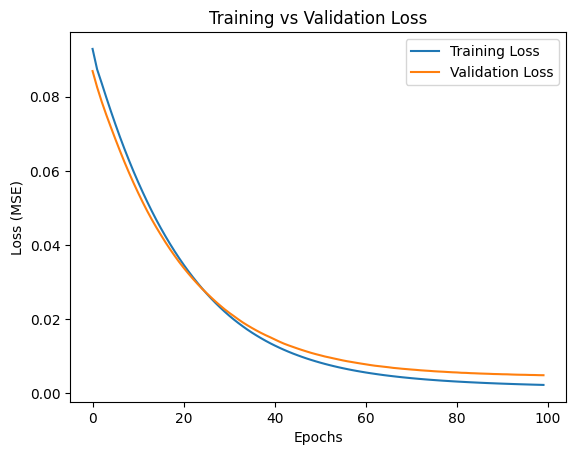

In [70]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()